### **Problem: Regression**

## **Objective: House Price Estimation in İstanbul**

# **Introduction**

Source: https://www.kaggle.com/datasets/aselasel/house-price-dataset

It is a data set containing the information and prices of houses for sale in Istanbul, Turkey. It consists of 38 columns and around 25,000 observations. According to the upload date, the data were collected from Turkey's largest advertisement site.
It is real life data and collected from the advertisement site in Turkey using python (requests and beautifulsoup). No preprocessing steps were applied.

Inputs:
     
    District: District where the house is located.
    Price: The price of the house for sale in Turkish lira.
    Address: It is the address where the house is located.
    AdUpdateDate: The date the ad was updated.
    Category: Type of ad (for sale only)
    GrossSquareMeters: Is the Gross Square Meters of the house.
    BuildingAge: Building age (in years)
    NumberFloorsofBuilding: Total number of floors of the building
    UsingStatus: Indicates who currently resides in the house to be sold.
    EligibilityForInvestment: Is it suitable for investment? (suitable or unknown)
    BuildStatus: Building status (new or second hand)
    TitleStatus:
    ItemStatus: Item status (empty or full)
    NumberOfBathrooms: Number of bathrooms
    NumberOfWCs: Number of toilet
    AdCreationDate: Ad creation date
    Type: Type of house for sale
    NetSquareMeters: Is the net square meter of the house.
    NumberOfRooms: Total number of rooms
    FloorLocation: Floor of the house
    HeatingType: Type of heating (combi, natural gas …)
    CreditEligibility: Eligibility for bank credit
    InsideTheSite: On site (yes or no)
    StructureType: Building material of the building (concrete, wood ….)
    MortgageStatus: Mortgage status
    Swap: Does the seller want to trade (or not)
    Balcony: Do you have a balcony at home?
    PriceStatus:
    RentalIncome: Rent earn
    NumberOfBalconies: Number of balconies in the house
    BalconyType: Balcony type (terrace, open balcony, ….)
    HallSquareMeters: Living room square meter
    WCSquareMeters: Square meter of toilet in the house
    IsItVideoNavigable?: Is there a possibility to review with video (yes or no)
    Subscription: How much is the monthly fee for the house
    BathroomSquareMeters: Square meter of the bathroom in the house
    BalconySquareMeters: square meter of balcony in the house
        
Thanks for 'codebasics youtube channel' for general analysis approach, inspiration and flask server operations.

# **1.Importing libraries and data**

In [4]:
# Exploratory data analysis and visualisation libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

# Data preprocessing and model selection
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import scale, StandardScaler

# Models from Scikit-Learn
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Model evaluations 
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error, r2_score, mean_absolute_error

In [5]:
# For fixing random_state parameters
seed = 20

In [6]:
df1 = pd.read_csv("HouseData.csv")

In [7]:
df1

,Unnamed: 0,district,price,address,AdUpdateDate,Category,GrossSquareMeters,BuildingAge,NumberFloorsofBuilding,UsingStatus,...,PriceStatus,RentalIncome,NumberOfBalconies,BalconyType,HallSquareMeters,WCSquareMeters,IsItVideoNavigable?,Subscription,BathroomSquareMeters,BalconySquareMeters
0,0,adalar,"3,100,000TL","['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",24 Şubat 2022,Satılık,160 m2,21 Ve Üzeri,3,Mülk Sahibi Oturuyor,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,adalar,"1,600,000TL","['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",02 Mart 2022,Satılık,120 m2,5-10,3,Mülk Sahibi Oturuyor,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,adalar,"18,500,000TL","['Anasayfa', 'Satılık Müstakil Ev', 'İstanbul ...",11 Şubat 2022,Satılık,350 m2,21 Ve Üzeri,2,Mülk Sahibi Oturuyor,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,adalar,"9,500,000TL","['Anasayfa', 'Satılık Bina', 'İstanbul Satılık...",11 Şubat 2022,Satılık,550 m2,11-15,3,Mülk Sahibi Oturuyor,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,adalar,"25,000,000TL","['Anasayfa', 'Satılık Köşk', 'İstanbul Satılık...",19 Ocak 2022,Satılık,840 m2,21 Ve Üzeri,4,Boş,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25150,25150,zeytinburnu,"1,850,000TL","['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",12 Ocak 2022,Satılık,180 m2,5-10,4,Mülk Sahibi Oturuyor,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25151,25151,zeytinburnu,"1,100,000TL","['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",10 Aralık 2021,Satılık,52 m2,3,16,Kiracı Oturuyor,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25152,25152,zeytinburnu,"9,000,000TL","['Anasayfa', 'Satılık Daire', 'İstanbul Satılı...",26 Şubat 2022,Satılık,176 m2,0 (Yeni),25,Boş,...,Genel Fiyat,NaN,NaN,NaN,55 m2,NaN,NaN,NaN,NaN,NaN
25153,25153,zeytinburnu,"13,000,000TL","['Anasayfa', 'Satılık Residence', 'İstanbul Sa...",18 Ekim 2021,Satılık,170 m2,5-10,30,Boş,...,Genel Fiyat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **2.Exploratory Data Analysis**

#### **2.1.General information about dtypes and null values**

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25155 entries, 0 to 25154
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                25155 non-null  int64 
 1   district                  25155 non-null  object
 2   price                     25155 non-null  object
 3   address                   25155 non-null  object
 4   AdUpdateDate              25155 non-null  object
 5   Category                  25155 non-null  object
 6   GrossSquareMeters         25155 non-null  object
 7   BuildingAge               25155 non-null  object
 8   NumberFloorsofBuilding    25155 non-null  int64 
 9   UsingStatus               25155 non-null  object
 10  EligibilityForInvestment  21506 non-null  object
 11  BuildStatus               11231 non-null  object
 12  TitleStatus               9712 non-null   object
 13  ItemStatus                18332 non-null  object
 14  NumberOfBathrooms     

#### **2.2.Number of observations and features**

In [10]:
df1.shape

(25155, 38)

#### **2.3.Missing values**

In [11]:
df1.isnull().sum()

Unnamed: 0                      0
district                        0
price                           0
address                         0
AdUpdateDate                    0
Category                        0
GrossSquareMeters               0
BuildingAge                     0
NumberFloorsofBuilding          0
UsingStatus                     0
EligibilityForInvestment     3649
BuildStatus                 13924
TitleStatus                 15443
ItemStatus                   6823
NumberOfBathrooms               0
NumberOfWCs                 17026
AdCreationDate                  0
Type                            0
NetSquareMeters                 0
NumberOfRooms                   0
FloorLocation                   0
HeatingType                     0
CreditEligibility               0
InsideTheSite                   0
StructureType               14749
MortgageStatus              19097
Swap                         4316
Balcony                     16046
PriceStatus                     0
RentalIncome  

In [12]:
# Feature contents
for column in df1.columns:
    print(df1.groupby(column)[column].agg("count"), "\n", 50*"-")

Unnamed: 0
0        1
1        1
2        1
3        1
4        1
        ..
25150    1
25151    1
25152    1
25153    1
25154    1
Name: Unnamed: 0, Length: 25155, dtype: int64 
 --------------------------------------------------
district
adalar             26
arnavutkoy        256
atasehir          378
avcilar           933
bagcilar          522
bahcelievler     1429
bakirkoy          673
basaksehir        671
bayrampasa        174
besiktas          659
beykoz            148
beylikduzu        888
beyoglu           228
buyukcekmece      756
catalca            74
cekmekoy          923
esenler           265
esenyurt         1415
eyupsultan        635
fatih             488
gaziosmanpasa     709
gungoren          221
kadikoy          1446
kagithane         756
kartal            619
kucukcekmece     1361
maltepe          1230
pendik            678
sancaktepe        918
sariyer          1449
sile               95
silivri           342
sisli             595
sultanbeyli       314
sultangazi  

In [13]:
# Operations summary

# ix  column_name               null_count      dtype   operation
# --- -----------               --------------  ------  ---------
# 0   Unnamed: 0                25155 non-null  int64   Drop
# 1   district                  25155 non-null  object  Encode = get_dummies 
# 2   price                     25155 non-null  object  Digitizate
# 3   address                   25155 non-null  object  Drop
# 4   AdUpdateDate              25155 non-null  object  Drop
# 5   Category                  25155 non-null  object  Drop
# 6   GrossSquareMeters         25155 non-null  object  Digitizate
# 7   BuildingAge               25155 non-null  object  Drop
# 8   NumberFloorsofBuilding    25155 non-null  int64   Drop
# 9   UsingStatus               25155 non-null  object  Drop
# 10  EligibilityForInvestment  21506 non-null  object  Drop
# 11  BuildStatus               11231 non-null  object  Drop
# 12  TitleStatus               9712 non-null   object  Drop
# 13  ItemStatus                18332 non-null  object  Fill by distribution rate & 
#                                                       Encode = get_dummies
# 14  NumberOfBathrooms         25155 non-null  object  Drop
# 15  NumberOfWCs               8129 non-null   object  Drop
# 16  AdCreationDate            25155 non-null  object  Drop
# 17  Type                      25155 non-null  object  Drop
# 18  NetSquareMeters           25155 non-null  object  Drop
# 19  NumberOfRooms             25155 non-null  object  Sum & 
#                                                       Split Hall
# 20  FloorLocation             25155 non-null  object  Drop
# 21  HeatingType               25155 non-null  object  Drop
# 22  CreditEligibility         25155 non-null  object  Drop
# 23  InsideTheSite             25155 non-null  object  Drop
# 24  StructureType             10406 non-null  object  Drop
# 25  MortgageStatus            6058 non-null   object  Drop
# 26  Swap                      20839 non-null  object  Drop
# 27  Balcony                   9109 non-null   object  Drop
# 28  PriceStatus               25155 non-null  object  Drop
# 29  RentalIncome              5815 non-null   object  Drop
# 30  NumberOfBalconies         5324 non-null   object  Drop
# 31  BalconyType               4720 non-null   object  Drop
# 32  HallSquareMeters          1433 non-null   object  Drop
# 33  WCSquareMeters            865 non-null    object  Drop
# 34  IsItVideoNavigable?       5481 non-null   object  Drop
# 35  Subscription              4488 non-null   object  Drop
# 36  BathroomSquareMeters      1112 non-null   object  Drop
# 37  BalconySquareMeters       1040 non-null   object  Drop

# Predictions by(district, GrossSquareMeters, ItemStatus, NumberOfRooms, *NumberOfHall)
# *will be created

In [14]:
# Column names
df1.columns

Index(['Unnamed: 0', 'district', 'price', 'address', 'AdUpdateDate',
       'Category', 'GrossSquareMeters', 'BuildingAge',
       'NumberFloorsofBuilding', 'UsingStatus', 'EligibilityForInvestment',
       'BuildStatus', 'TitleStatus', 'ItemStatus', 'NumberOfBathrooms',
       'NumberOfWCs', 'AdCreationDate', 'Type', 'NetSquareMeters',
       'NumberOfRooms', 'FloorLocation', 'HeatingType', 'CreditEligibility',
       'InsideTheSite', 'StructureType', 'MortgageStatus', 'Swap', 'Balcony',
       'PriceStatus', 'RentalIncome', 'NumberOfBalconies', 'BalconyType',
       'HallSquareMeters', 'WCSquareMeters', 'IsItVideoNavigable?',
       'Subscription', 'BathroomSquareMeters', 'BalconySquareMeters'],
      dtype='object')

# **3.Data cleaning**

In [15]:
#According to list above we drop features
df2 = df1.drop(['Unnamed: 0', 'address', 'AdUpdateDate', 'Category',
       'BuildingAge', 'NumberFloorsofBuilding', 'UsingStatus', 'EligibilityForInvestment',
       'BuildStatus', 'TitleStatus', 'NumberOfBathrooms', 'NumberOfWCs', 
       'AdCreationDate', 'Type', 'NetSquareMeters', 'FloorLocation', 'HeatingType', 
       'CreditEligibility', 'InsideTheSite', 'StructureType', 'MortgageStatus', 
       'Swap', 'Balcony', 'PriceStatus', 'RentalIncome', 'NumberOfBalconies', 
       'BalconyType', 'HallSquareMeters', 'WCSquareMeters', 'IsItVideoNavigable?',
       'Subscription', 'BathroomSquareMeters', 'BalconySquareMeters'], axis = "columns")
df2

,district,price,GrossSquareMeters,ItemStatus,NumberOfRooms
0,adalar,"3,100,000TL",160 m2,Eşyalı,3+1
1,adalar,"1,600,000TL",120 m2,Eşyalı,2+1
2,adalar,"18,500,000TL",350 m2,Boş,3+1
3,adalar,"9,500,000TL",550 m2,NaN,8+ Oda
4,adalar,"25,000,000TL",840 m2,NaN,8+ Oda
...,...,...,...,...,...
25150,zeytinburnu,"1,850,000TL",180 m2,NaN,4+1
25151,zeytinburnu,"1,100,000TL",52 m2,Boş,1+1
25152,zeytinburnu,"9,000,000TL",176 m2,Boş,3+1
25153,zeytinburnu,"13,000,000TL",170 m2,Boş,3+1


#### **3.1.Missing values**

In [16]:
# Again missing values
df2.isnull().sum()

district                0
price                   0
GrossSquareMeters       0
ItemStatus           6823
NumberOfRooms           0
dtype: int64

In [17]:
# Fill missing values by distribution rate
dist_rate = df2.ItemStatus.value_counts(normalize = True)
# Item status distribution rates
print(dist_rate)

Boş       0.954124
Eşyalı    0.045876
Name: ItemStatus, dtype: float64


In [18]:
# Missing values on column
missing = df2['ItemStatus'].isnull()

In [19]:
# Impute missing values by distribution rate
df3 = df2.copy()
df3.loc[missing, 'ItemStatus'] = np.random.choice(dist_rate.index, size = len(df2[missing]), p = dist_rate.values)
df3

,district,price,GrossSquareMeters,ItemStatus,NumberOfRooms
0,adalar,"3,100,000TL",160 m2,Eşyalı,3+1
1,adalar,"1,600,000TL",120 m2,Eşyalı,2+1
2,adalar,"18,500,000TL",350 m2,Boş,3+1
3,adalar,"9,500,000TL",550 m2,Boş,8+ Oda
4,adalar,"25,000,000TL",840 m2,Boş,8+ Oda
...,...,...,...,...,...
25150,zeytinburnu,"1,850,000TL",180 m2,Boş,4+1
25151,zeytinburnu,"1,100,000TL",52 m2,Boş,1+1
25152,zeytinburnu,"9,000,000TL",176 m2,Boş,3+1
25153,zeytinburnu,"13,000,000TL",170 m2,Boş,3+1


In [20]:
# No more missing values
df3.isnull().sum()

district             0
price                0
GrossSquareMeters    0
ItemStatus           0
NumberOfRooms        0
dtype: int64

#### **3.2.Digitalize features**

In [22]:
# Number of rooms
room_types = df3["NumberOfRooms"].value_counts() # Value counts
room_types

2+1       9752
3+1       6868
1+1       2046
4+1       1687
4+2       1148
3+2        642
5+2        597
5+1        589
8+ Oda     324
Stüdyo     263
6+2        233
6+1        180
1 Oda      169
2+2        161
3.5+1       87
7+2         72
4.5+1       55
2.5+1       48
7+3         42
7+1         41
5+3         41
6+3         37
1.5+1       32
2+0         14
5 Oda       13
6+4         10
5+4          4
Name: NumberOfRooms, dtype: int64

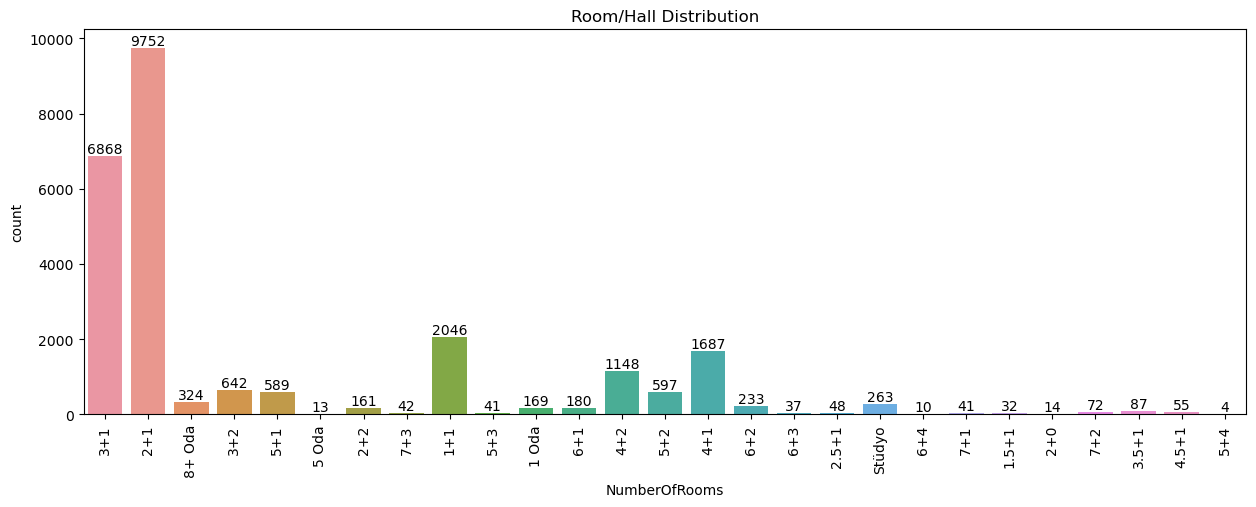

In [23]:
# Adjusts the width and height of the figure
plt.figure(figsize = (15, 5))
# Count plot based on NumberOfRooms
ax = sns.countplot(data = df3, x = "NumberOfRooms")
# Container counts
ax.bar_label(ax.containers[0])
# Rotate 90 Room Types on xlabel
plt.xticks(rotation = 90)
# Title
plt.title("Room/Hall Distribution");

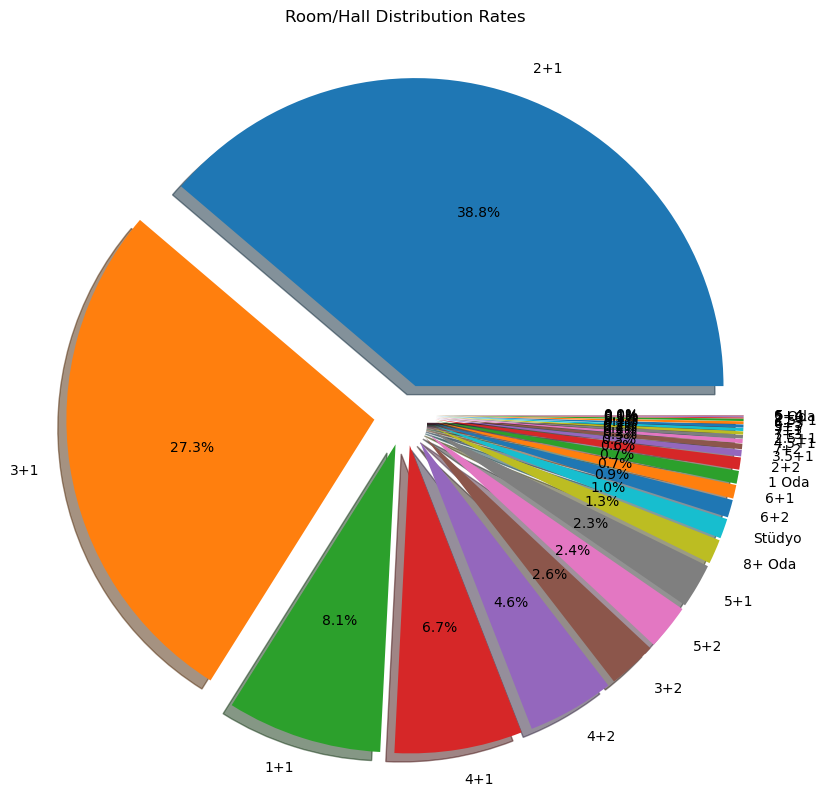

In [24]:
# Adjusts the width and height of the figure
plt.figure(figsize = (10, 10))
# Pie plot based on NumberOfRooms
plt.pie(x = room_types, 
        explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
        labels = room_types.index,
        autopct = "%.1f%%", 
        shadow = True)
# Title
plt.title("Room/Hall Distribution Rates");

In [25]:
# Convert number of rooms to room + hall format
def convert_rooms_to_room_hall(x):
    if x == "Stüdyo":
        return "1+0"
    elif x == "8+ Oda":
        return "8+0"
    elif "Oda" in x:
        return x.replace(" Oda", "+0")
    return x

# Number of halls only
def convert_rooms_to_hall(x):
    token = x.split("+")
    return float(token[1])

# Number of rooms only
def convert_rooms_to_room(x):
    token = x.split("+")
    return float(token[0])

# Number of total rooms (room + hall)
def convert_rooms_to_total_room(x):
    token = x.split("+")
    return (float(token[0]) + float(token[1]))
    try:
        return float(x)
    except:
        return None

In [26]:
# Implement functions to NumberOfRooms column
df4 = df3.copy()
df4["NumberOfRooms"] = df4["NumberOfRooms"].apply(convert_rooms_to_room_hall)
df4["hall"] = df4["NumberOfRooms"].apply(convert_rooms_to_hall)
df4["total_room"] = df4["NumberOfRooms"].apply(convert_rooms_to_total_room)
df4["NumberOfRooms"] = df4["NumberOfRooms"].apply(convert_rooms_to_room)
df4

,district,price,GrossSquareMeters,ItemStatus,NumberOfRooms,hall,total_room
0,adalar,"3,100,000TL",160 m2,Eşyalı,3.0,1.0,4.0
1,adalar,"1,600,000TL",120 m2,Eşyalı,2.0,1.0,3.0
2,adalar,"18,500,000TL",350 m2,Boş,3.0,1.0,4.0
3,adalar,"9,500,000TL",550 m2,Boş,8.0,0.0,8.0
4,adalar,"25,000,000TL",840 m2,Boş,8.0,0.0,8.0
...,...,...,...,...,...,...,...
25150,zeytinburnu,"1,850,000TL",180 m2,Boş,4.0,1.0,5.0
25151,zeytinburnu,"1,100,000TL",52 m2,Boş,1.0,1.0,2.0
25152,zeytinburnu,"9,000,000TL",176 m2,Boş,3.0,1.0,4.0
25153,zeytinburnu,"13,000,000TL",170 m2,Boş,3.0,1.0,4.0


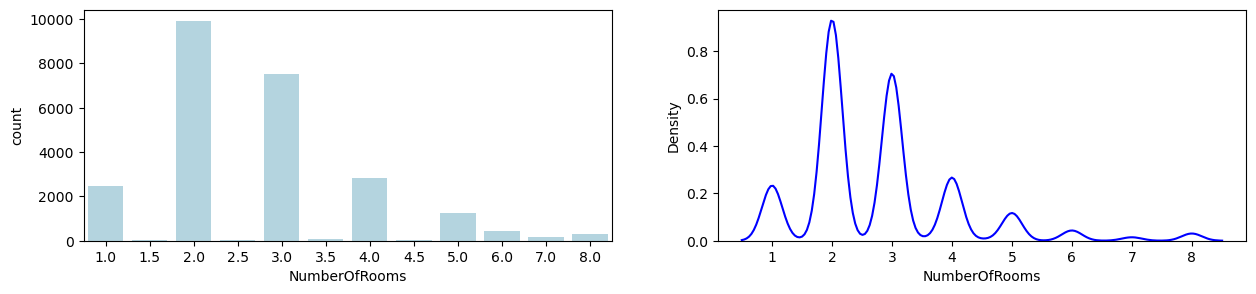

In [27]:
# Distribution of room numbers

# Create a single row subplot layout with two columns
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2) 
# Adjusts the width and height of the figure
fig.set_size_inches([15, 3]) 
# Count plot based on NumberOfRooms
sns.countplot(data = df4, x = 'NumberOfRooms', color = "lightblue", dodge = False, ax = ax0) 
# Kde plot based on NumberOfRooms
sns.kdeplot(data = df4, x = 'NumberOfRooms', color = "blue", ax = ax1); 

In [28]:
# Price
df4.groupby("price")["price"].agg("count")

price
1,000,000TL                     165
1,000,000TLarrow_downward%10      1
1,000,000TLarrow_downward%14      1
1,000,000TLarrow_downward%20      1
1,000,000TLarrow_downward%29      1
                               ... 
999,000TL                        11
999,000TLarrow_downward%10        1
999,000TLarrow_downward%3         1
999,000TLarrow_downward%5         1
999,999TL                         2
Name: price, Length: 2825, dtype: int64

In [29]:
# Convert price to numerical value
def convert_price_to_num(x):
    temp = x.replace(",", "").split("T")
    return float(temp[0])
    try:
        return float(x)
    except:
        return None

In [30]:
# Implement function to price column
df5 = df4.copy()
df5["price"] = df5["price"].apply(convert_price_to_num)
df5

,district,price,GrossSquareMeters,ItemStatus,NumberOfRooms,hall,total_room
0,adalar,3100000.0,160 m2,Eşyalı,3.0,1.0,4.0
1,adalar,1600000.0,120 m2,Eşyalı,2.0,1.0,3.0
2,adalar,18500000.0,350 m2,Boş,3.0,1.0,4.0
3,adalar,9500000.0,550 m2,Boş,8.0,0.0,8.0
4,adalar,25000000.0,840 m2,Boş,8.0,0.0,8.0
...,...,...,...,...,...,...,...
25150,zeytinburnu,1850000.0,180 m2,Boş,4.0,1.0,5.0
25151,zeytinburnu,1100000.0,52 m2,Boş,1.0,1.0,2.0
25152,zeytinburnu,9000000.0,176 m2,Boş,3.0,1.0,4.0
25153,zeytinburnu,13000000.0,170 m2,Boş,3.0,1.0,4.0


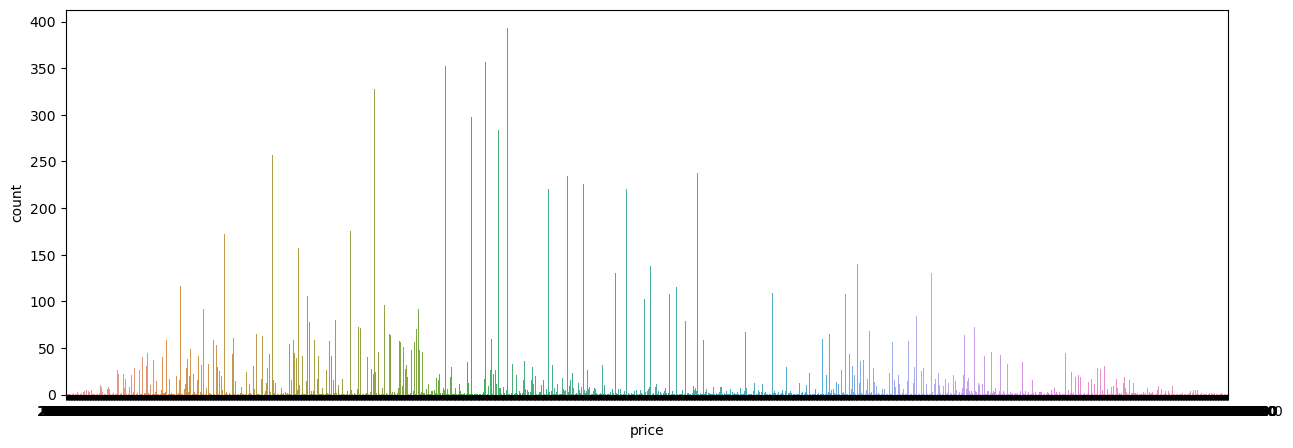

In [31]:
# Distribution of price

# Adjusts the width and height of the figure
plt.figure(figsize = (15, 5))
# Count plot based on price
sns.countplot(data = df5, x = 'price', dodge = False); 

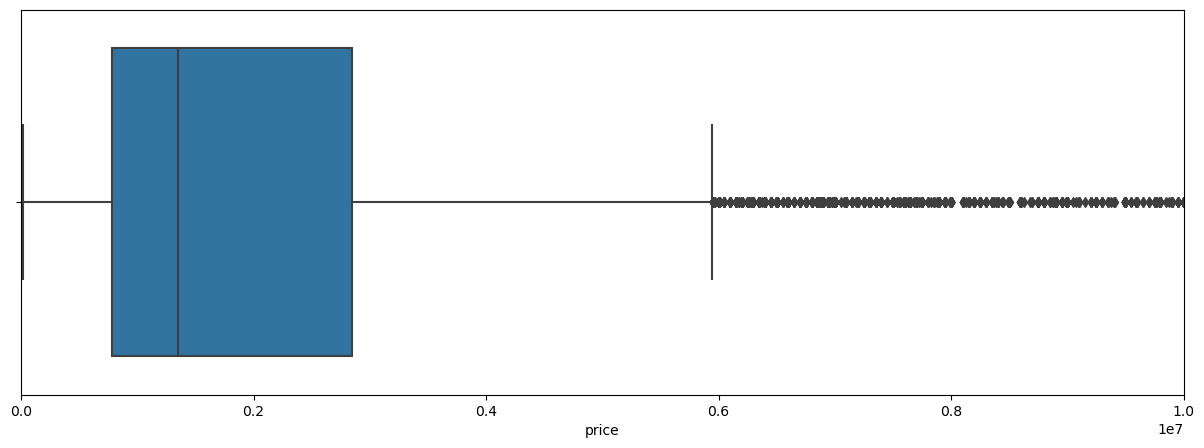

In [32]:
# Adjusts the width and height of the figure
plt.figure(figsize = (15, 5))
# Define xlabel range
plt.xlim(0, 0.001e10)
# Box plot based on price
sns.boxplot(data = df5, x = "price");

In [33]:
# Prices above 6.000.000 looks unusual, we will handle them later

In [34]:
# GrossSquareMeters
df5.groupby("GrossSquareMeters")["GrossSquareMeters"].agg("count")

GrossSquareMeters
1.000 m2    26
1.014 m2     1
1.048 m2     1
1.050 m2     3
1.074 m2     1
            ..
976 m2       1
98 m2       81
980 m2       1
99 m2       12
990 m2       1
Name: GrossSquareMeters, Length: 584, dtype: int64

In [35]:
# Convert GrossSquareMeters to numerical value
def convert_grosssquaremeters_to_num(x):
    temp = x.split(" ")
    return float(temp[0])
    try:
        return float(x)
    except:
        return None

In [36]:
# Implement function to GrossSquareMeters column
df6 = df5.copy()
df6["GrossSquareMeters"] = df6["GrossSquareMeters"].apply(convert_grosssquaremeters_to_num)
df6

,district,price,GrossSquareMeters,ItemStatus,NumberOfRooms,hall,total_room
0,adalar,3100000.0,160.0,Eşyalı,3.0,1.0,4.0
1,adalar,1600000.0,120.0,Eşyalı,2.0,1.0,3.0
2,adalar,18500000.0,350.0,Boş,3.0,1.0,4.0
3,adalar,9500000.0,550.0,Boş,8.0,0.0,8.0
4,adalar,25000000.0,840.0,Boş,8.0,0.0,8.0
...,...,...,...,...,...,...,...
25150,zeytinburnu,1850000.0,180.0,Boş,4.0,1.0,5.0
25151,zeytinburnu,1100000.0,52.0,Boş,1.0,1.0,2.0
25152,zeytinburnu,9000000.0,176.0,Boş,3.0,1.0,4.0
25153,zeytinburnu,13000000.0,170.0,Boş,3.0,1.0,4.0


In [37]:
#According to domain knowledge i have, apartments have gross square meter by room > 100 are unusual, so those are outliers
df6[(df6.GrossSquareMeters / df6.total_room) > 100]

,district,price,GrossSquareMeters,ItemStatus,NumberOfRooms,hall,total_room
4,adalar,25000000.0,840.0,Boş,8.0,0.0,8.0
19,adalar,3100000.0,250.0,Boş,1.0,0.0,1.0
23,adalar,9000000.0,550.0,Boş,1.0,0.0,1.0
46,arnavutkoy,1150000.0,350.0,Boş,2.0,1.0,3.0
94,arnavutkoy,10000000.0,700.0,Boş,2.0,1.0,3.0
...,...,...,...,...,...,...,...
24802,uskudar,38500000.0,950.0,Boş,5.0,2.0,7.0
24803,uskudar,38500000.0,950.0,Boş,5.0,2.0,7.0
24949,uskudar,55000000.0,750.0,Boş,4.0,2.0,6.0
25106,zeytinburnu,22260000.0,945.0,Boş,8.0,0.0,8.0


In [38]:
# Remove those outliers above
df7 = df6.copy()
df7 = df6[~((df6.GrossSquareMeters / df6.total_room) > 100)]
df7

,district,price,GrossSquareMeters,ItemStatus,NumberOfRooms,hall,total_room
0,adalar,3100000.0,160.0,Eşyalı,3.0,1.0,4.0
1,adalar,1600000.0,120.0,Eşyalı,2.0,1.0,3.0
2,adalar,18500000.0,350.0,Boş,3.0,1.0,4.0
3,adalar,9500000.0,550.0,Boş,8.0,0.0,8.0
5,adalar,7000000.0,200.0,Boş,3.0,2.0,5.0
...,...,...,...,...,...,...,...
25150,zeytinburnu,1850000.0,180.0,Boş,4.0,1.0,5.0
25151,zeytinburnu,1100000.0,52.0,Boş,1.0,1.0,2.0
25152,zeytinburnu,9000000.0,176.0,Boş,3.0,1.0,4.0
25153,zeytinburnu,13000000.0,170.0,Boş,3.0,1.0,4.0


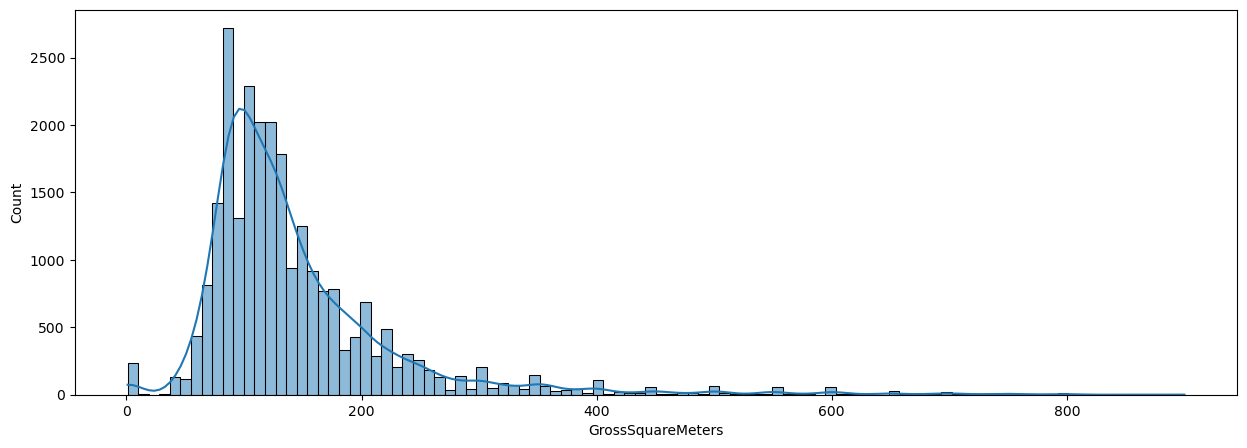

In [39]:
# Distribution of size

# Adjusts the width and height of the figure
plt.figure(figsize = (15, 5))
# Histogram plot based on GrossSquareMeters
sns.histplot(data = df7, x = 'GrossSquareMeters', bins = 100, kde = True);

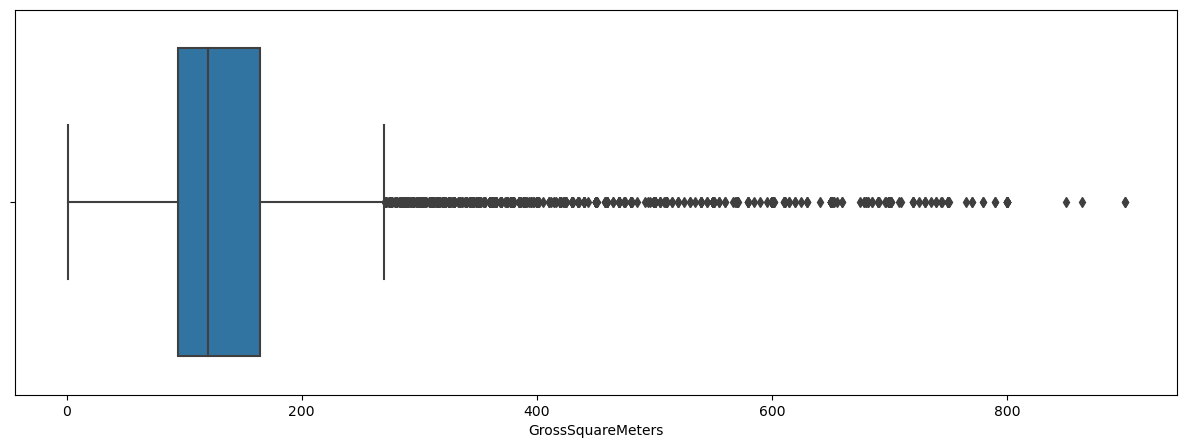

In [40]:
# Adjusts the width and height of the figure
plt.figure(figsize = (15, 5))
# Box plot based on GrossSquareMeters
sns.boxplot(data = df7, x = "GrossSquareMeters");

In [41]:
# Square meters above 250 looks unusual, we will handle them later

In [42]:
# Doing some feature engineering here and creating a new feature which can be helpful for outlier detection and removal
df8 = df7.copy()
df8["price_per_sqmt"] = df8["price"] / df8["GrossSquareMeters"]
df8

,district,price,GrossSquareMeters,ItemStatus,NumberOfRooms,hall,total_room,price_per_sqmt
0,adalar,3100000.0,160.0,Eşyalı,3.0,1.0,4.0,19375.000000
1,adalar,1600000.0,120.0,Eşyalı,2.0,1.0,3.0,13333.333333
2,adalar,18500000.0,350.0,Boş,3.0,1.0,4.0,52857.142857
3,adalar,9500000.0,550.0,Boş,8.0,0.0,8.0,17272.727273
5,adalar,7000000.0,200.0,Boş,3.0,2.0,5.0,35000.000000
...,...,...,...,...,...,...,...,...
25150,zeytinburnu,1850000.0,180.0,Boş,4.0,1.0,5.0,10277.777778
25151,zeytinburnu,1100000.0,52.0,Boş,1.0,1.0,2.0,21153.846154
25152,zeytinburnu,9000000.0,176.0,Boş,3.0,1.0,4.0,51136.363636
25153,zeytinburnu,13000000.0,170.0,Boş,3.0,1.0,4.0,76470.588235


In [43]:
# Min and max prices per square meter looks unusual
df8.price_per_sqmt.describe()

count    2.486400e+04
mean     4.257854e+05
std      1.025231e+07
min      4.666667e+01
25%      7.014745e+03
50%      1.083333e+04
75%      2.059547e+04
max      6.125000e+08
Name: price_per_sqmt, dtype: float64

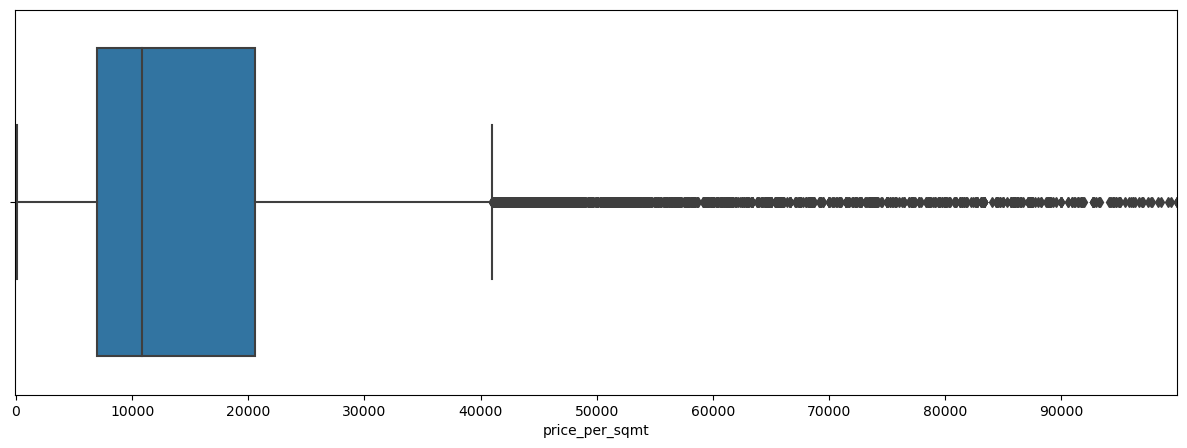

In [44]:
# Box plot based on price_per_sqmt
plt.figure(figsize = (15, 5))
plt.xlim(-100, 0.01e7)
plt.xticks(np.arange(0, 100000, 10000))
sns.boxplot(data = df8, x = "price_per_sqmt");

In [45]:
# According to domain knowledge i have and to boxbplot above, price per square meters above 35.000 and below 3500 looks unusual

In [46]:
# Removing those outliers above
df9 = df8.copy()
df9 = df8[~(df8["price_per_sqmt"] > 35000) & ~(df8["price_per_sqmt"] < 3500)]
df9

,district,price,GrossSquareMeters,ItemStatus,NumberOfRooms,hall,total_room,price_per_sqmt
0,adalar,3100000.0,160.0,Eşyalı,3.0,1.0,4.0,19375.000000
1,adalar,1600000.0,120.0,Eşyalı,2.0,1.0,3.0,13333.333333
3,adalar,9500000.0,550.0,Boş,8.0,0.0,8.0,17272.727273
5,adalar,7000000.0,200.0,Boş,3.0,2.0,5.0,35000.000000
6,adalar,3250000.0,400.0,Eşyalı,8.0,0.0,8.0,8125.000000
...,...,...,...,...,...,...,...,...
25143,zeytinburnu,4400000.0,137.0,Boş,2.0,1.0,3.0,32116.788321
25146,zeytinburnu,5150000.0,401.0,Boş,8.0,0.0,8.0,12842.892768
25150,zeytinburnu,1850000.0,180.0,Boş,4.0,1.0,5.0,10277.777778
25151,zeytinburnu,1100000.0,52.0,Boş,1.0,1.0,2.0,21153.846154


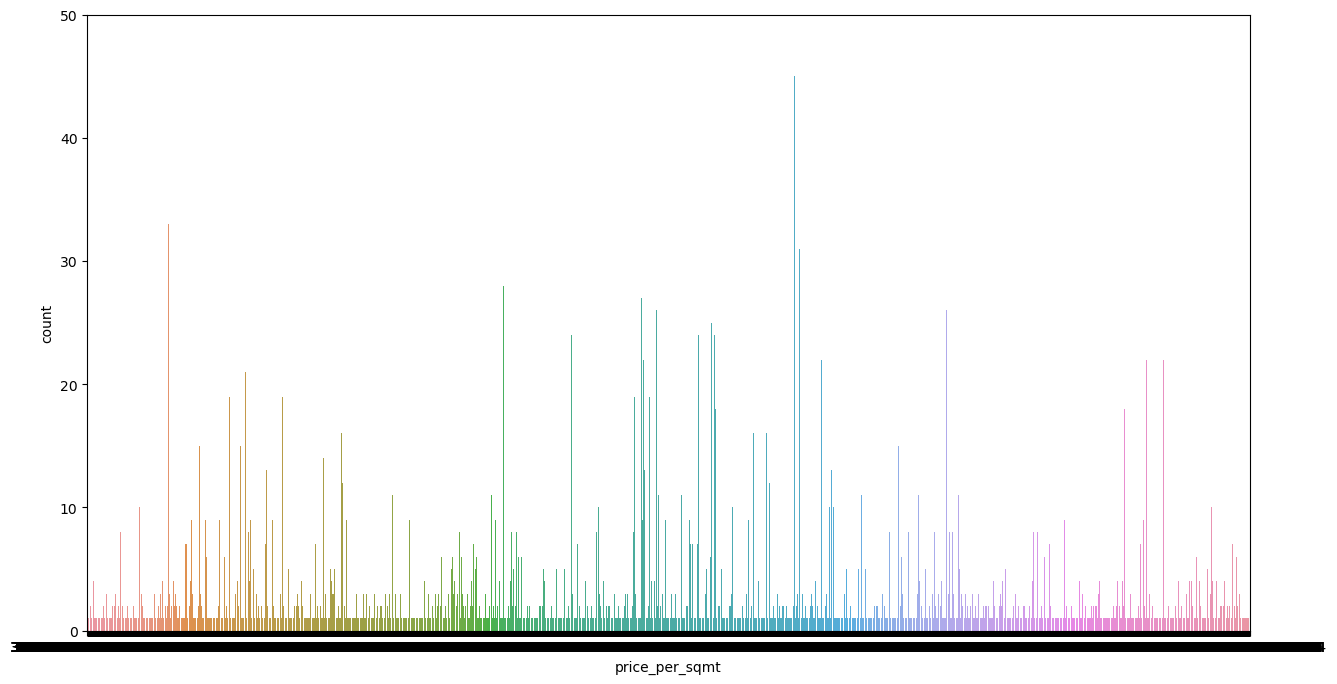

In [47]:
# Distribution of price_per_sqmt

# Adjusts the width and height of the figure
plt.figure(figsize = (15, 8))
# Define ylabel range 
plt.ylim(0, 50)
# Define yticks
plt.yticks(np.arange(0, 60, 10))
# Count plot based on price_per_sqmt
sns.countplot(data = df9, x = 'price_per_sqmt', dodge = False);

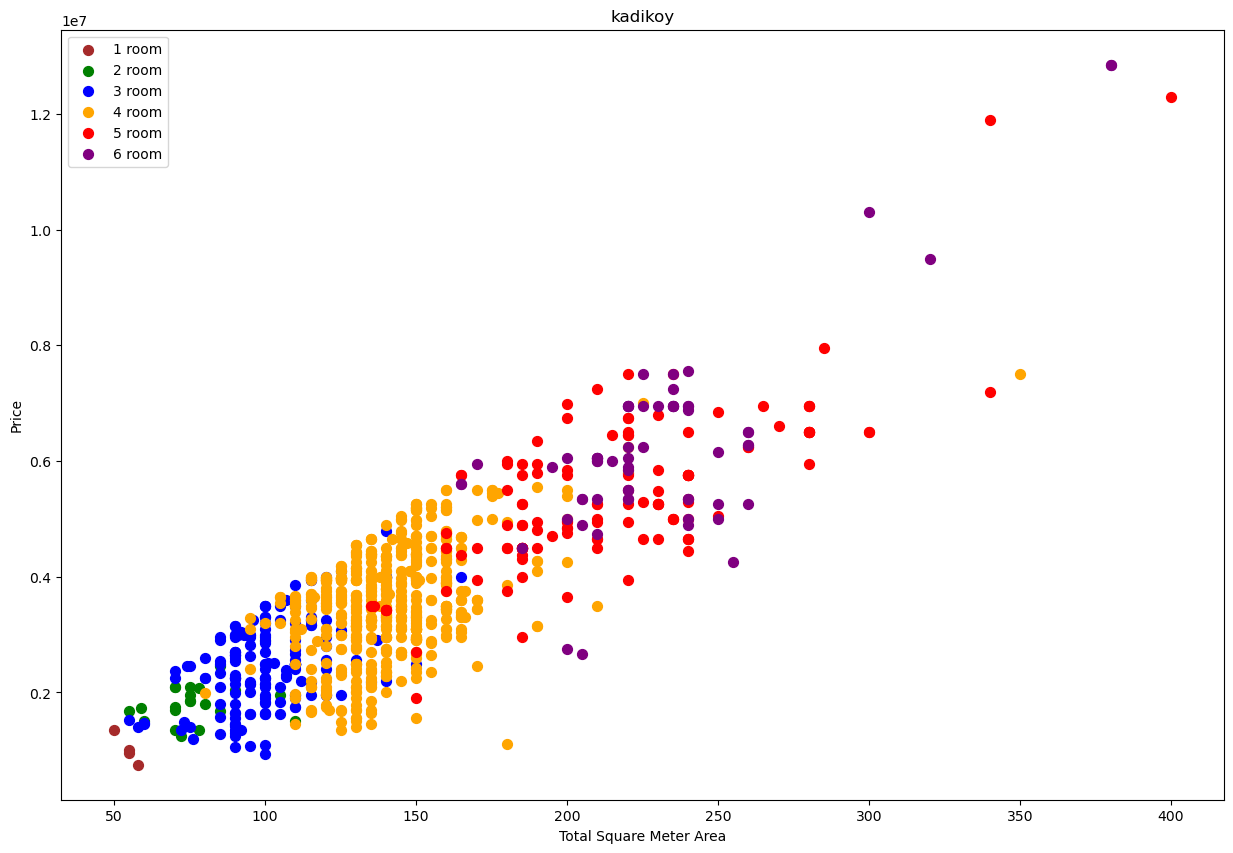

In [48]:
# Distribution of prices by room/hall numbers in a district

def plot_scatter_chart(df, district):
    # Number of rooms
    room1 = df[(df.district == district) & (df.total_room == 1)]
    room2 = df[(df.district == district) & (df.total_room == 2)]
    room3 = df[(df.district == district) & (df.total_room == 3)]
    room4 = df[(df.district == district) & (df.total_room == 4)]
    room5 = df[(df.district == district) & (df.total_room == 5)]
    room6 = df[(df.district == district) & (df.total_room == 6)]
    # Adjusts the width and height of the figure
    plt.figure(figsize = (15, 10))
    # Scatter plot by price & GrossSquareMeters
    plt.scatter(room1.GrossSquareMeters, room1.price, color = "brown", label = "1 room", s = 50)
    plt.scatter(room2.GrossSquareMeters, room2.price, color = "green", label = "2 room", s = 50)
    plt.scatter(room3.GrossSquareMeters, room3.price, color = "blue", label = "3 room", s = 50)
    plt.scatter(room4.GrossSquareMeters, room4.price, color = "orange", label = "4 room", s = 50)
    plt.scatter(room5.GrossSquareMeters, room5.price, color = "red", label = "5 room", s = 50)
    plt.scatter(room6.GrossSquareMeters, room6.price, color = "purple", label = "6 room", s = 50)
    # Xlabel name
    plt.xlabel("Total Square Meter Area")
    # Ylabel name
    plt.ylabel("Price")
    # Title
    plt.title(district)
    # Legend
    plt.legend()
    
plot_scatter_chart(df9, "kadikoy")

In [49]:
# There are still some outliers whose have more rooms and less prices
def remove_room_outliers(df):
    exclude_indices = np.array([]) # List for temporary values
    for district, district_df in df.groupby("district"):
        room_stats = {} # Empty dict for stats
        for room, room_df in district_df.groupby("total_room"):
            # Mean, std and count stats 
            room_stats[room] = {
                "mean": np.mean(room_df.price_per_sqmt),
                "std": np.std(room_df.price_per_sqmt),
                "count": room_df.shape[0]
            }
        for room, room_df in district_df.groupby("total_room"):
            stats = room_stats.get(room-1) # Check for previous stat
            if stats and stats["count"] > 5: # Check if previous stat and count > 5
                # Remove whose price per sqmt < mean of price per sqmt
                exclude_indices = np.append(exclude_indices, room_df[room_df.price_per_sqmt < (stats["mean"])].index.values)
    return df.drop(exclude_indices, axis = "index")

In [50]:
# Implement function
df10 = df9.copy()
df10 = remove_room_outliers(df9)
df10

,district,price,GrossSquareMeters,ItemStatus,NumberOfRooms,hall,total_room,price_per_sqmt
0,adalar,3100000.0,160.0,Eşyalı,3.0,1.0,4.0,19375.000000
1,adalar,1600000.0,120.0,Eşyalı,2.0,1.0,3.0,13333.333333
3,adalar,9500000.0,550.0,Boş,8.0,0.0,8.0,17272.727273
5,adalar,7000000.0,200.0,Boş,3.0,2.0,5.0,35000.000000
6,adalar,3250000.0,400.0,Eşyalı,8.0,0.0,8.0,8125.000000
...,...,...,...,...,...,...,...,...
25142,zeytinburnu,4400000.0,137.0,Boş,2.0,1.0,3.0,32116.788321
25143,zeytinburnu,4400000.0,137.0,Boş,2.0,1.0,3.0,32116.788321
25146,zeytinburnu,5150000.0,401.0,Boş,8.0,0.0,8.0,12842.892768
25151,zeytinburnu,1100000.0,52.0,Boş,1.0,1.0,2.0,21153.846154


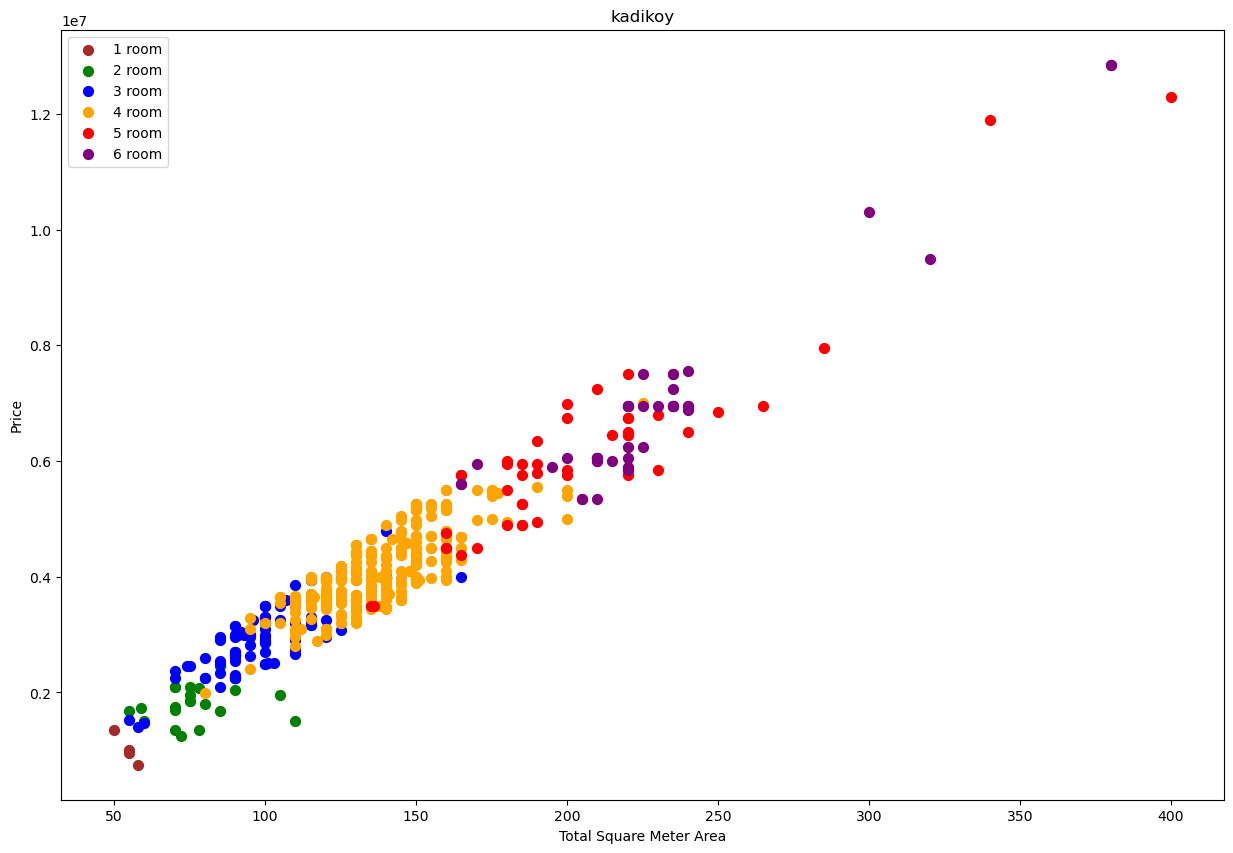

In [51]:
# Although we haven't gotten rid of all the outliers, we now have more organized data
plot_scatter_chart(df10, "kadikoy")

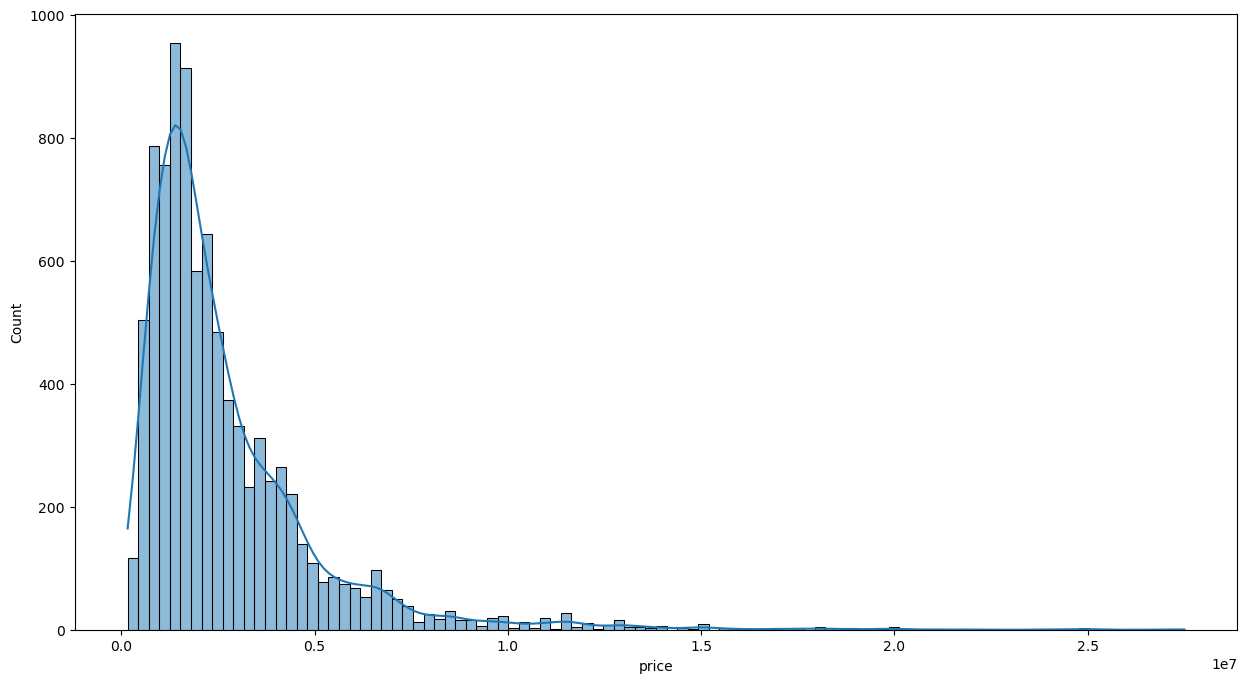

In [52]:
# Final distribution of prices

# Adjusts the width and height of the figure
plt.figure(figsize = (15, 8))
# Histogram plot based on price_per_sqmt
sns.histplot(data = df10, x = "price", bins = 100, kde = True);

# **4.Data preprocessing**

In [53]:
# Encoding categorical features
dummies1 = pd.get_dummies(df10.district)
dummies2 = pd.get_dummies(df10.ItemStatus)

In [54]:
# Concatenate dummies and dataframe
df11 = df10.copy()
df11 = pd.concat([df10, dummies1], axis = "columns")
df11 = pd.concat([df11, dummies2], axis = "columns")
# Column names
df11.columns

Index(['district', 'price', 'GrossSquareMeters', 'ItemStatus', 'NumberOfRooms',
       'hall', 'total_room', 'price_per_sqmt', 'adalar', 'arnavutkoy',
       'atasehir', 'avcilar', 'bagcilar', 'bahcelievler', 'bakirkoy',
       'basaksehir', 'bayrampasa', 'besiktas', 'beykoz', 'beylikduzu',
       'beyoglu', 'buyukcekmece', 'catalca', 'cekmekoy', 'esenler', 'esenyurt',
       'eyupsultan', 'fatih', 'gaziosmanpasa', 'gungoren', 'kadikoy',
       'kagithane', 'kartal', 'kucukcekmece', 'maltepe', 'pendik',
       'sancaktepe', 'sariyer', 'sile', 'silivri', 'sisli', 'sultanbeyli',
       'sultangazi', 'tuzla', 'umraniye', 'uskudar', 'zeytinburnu', 'Boş',
       'Eşyalı'],
      dtype='object')

In [55]:
# We don't need some features anymore, so drop them
df12 = df11.copy()
df12 = df11.drop(['district', 'ItemStatus', 'total_room', 'price_per_sqmt'], axis = "columns")
df12.columns

Index(['price', 'GrossSquareMeters', 'NumberOfRooms', 'hall', 'adalar',
       'arnavutkoy', 'atasehir', 'avcilar', 'bagcilar', 'bahcelievler',
       'bakirkoy', 'basaksehir', 'bayrampasa', 'besiktas', 'beykoz',
       'beylikduzu', 'beyoglu', 'buyukcekmece', 'catalca', 'cekmekoy',
       'esenler', 'esenyurt', 'eyupsultan', 'fatih', 'gaziosmanpasa',
       'gungoren', 'kadikoy', 'kagithane', 'kartal', 'kucukcekmece', 'maltepe',
       'pendik', 'sancaktepe', 'sariyer', 'sile', 'silivri', 'sisli',
       'sultanbeyli', 'sultangazi', 'tuzla', 'umraniye', 'uskudar',
       'zeytinburnu', 'Boş', 'Eşyalı'],
      dtype='object')

In [56]:
# Independent variables
X = df12.drop("price", axis = "columns")
X

,GrossSquareMeters,NumberOfRooms,hall,adalar,arnavutkoy,atasehir,avcilar,bagcilar,bahcelievler,bakirkoy,...,silivri,sisli,sultanbeyli,sultangazi,tuzla,umraniye,uskudar,zeytinburnu,Boş,Eşyalı
0,160.0,3.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,120.0,2.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,550.0,8.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,200.0,3.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,400.0,8.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25142,137.0,2.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
25143,137.0,2.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
25146,401.0,8.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
25151,52.0,1.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [57]:
# Dependent variable
y = df12.price
y

0        3100000.0
1        1600000.0
3        9500000.0
5        7000000.0
6        3250000.0
           ...    
25142    4400000.0
25143    4400000.0
25146    5150000.0
25151    1100000.0
25154    1000000.0
Name: price, Length: 8909, dtype: float64

In [58]:
# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

# **5.Model building**

In [59]:
# Model selection
scoresCV = []
regressors = [Ridge(),
              LinearRegression(),
              KNeighborsRegressor(),
              DecisionTreeRegressor(),
              GradientBoostingRegressor(),
              RandomForestRegressor(), 
              ]

for regressor in regressors:
    scoreCV = cross_val_score(regressor,
                              X_train,
                              y_train,
                              cv = ShuffleSplit(n_splits = 5, 
                                                test_size = 0.2,
                                                random_state = seed))
    scoresCV.append([regressor, np.mean(scoreCV)])

In [60]:
# Best regressors according to validation accuracy descending
c_val = pd.DataFrame(scoresCV, columns = ["Regressor", "Score"])
c_val_sort = c_val.sort_values(by = "Score", ignore_index = True)
c_val_sort

,Regressor,Score
0,DecisionTreeRegressor(),0.719784
1,KNeighborsRegressor(),0.735093
2,GradientBoostingRegressor(),0.794605
3,LinearRegression(),0.796123
4,Ridge(),0.796218
5,RandomForestRegressor(),0.812566


In [61]:
# We can do some hyper-paramater tuning on Random Forest model for better scores

# Creating model
reg = RandomForestRegressor()
# Searching parameters
params = {"n_estimators": [100, 200, 300, 400, 500],
          "max_features": [1, 2, 3, 4, 5],
          "max_depth": [1, 2, 3, 4, 5],
          "max_samples": [1000, 2000, 3000, 4000, 5000],
          "min_samples_split": [10, 20, 30, 40, 50]
         }
# Creating grid
rf_reg_grid = RandomizedSearchCV(estimator = reg, 
                                 param_distributions = params,
                                 cv = ShuffleSplit(n_splits = 5, 
                                                   test_size = 0.2,
                                                   random_state = seed),
                                 n_iter = 10,
                                 verbose = 2, 
                                 n_jobs = -1)
# Fit the model
rf_model = rf_reg_grid.fit(X_train, y_train)

# Get best parameters
print("Best parameters for Random Forest model: ", rf_model.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Random Forest model:  {'n_estimators': 400, 'min_samples_split': 30, 'max_samples': 1000, 'max_features': 4, 'max_depth': 5}


In [62]:
# Convert the best parameters to dataframe
rf_best = pd.DataFrame.from_dict(rf_model.best_params_, orient = "index").rename(columns = {0: "Best"})
rf_best

,Best
n_estimators,400
min_samples_split,30
max_samples,1000
max_features,4
max_depth,5


In [63]:
# Build the model with best parameters
rf_reg = RandomForestRegressor(n_estimators = int(rf_best.iloc[0,0]),
                               min_samples_split = int(rf_best.iloc[1,0]),
                               max_samples = int(rf_best.iloc[2,0]),
                               max_features = int(rf_best.iloc[3,0]),
                               max_depth = int(rf_best.iloc[4,0]),
                               random_state = seed)
# Fit the model
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features=4, max_samples=1000,
                      min_samples_split=30, n_estimators=400, random_state=20)

In [64]:
# Predictions and score
rf_pred = rf_reg.predict(X_test)
rf_reg.score(X_test, y_test)

0.5345616113652983

In [70]:
# We didn't get better results, so default parameters will be better.
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_reg.score(X_test, y_test)

0.8568345913404213

# **6.Predictions**

In [66]:
# Predict prices by district, GrossSquareMeters, ItemStatus, NumberOfRooms and Hall
def predict_price(district, item, sqmt, room, hall):
    dist_index = np.where(X.columns == district)[0][0] # District indices
    item_index = np.where(X.columns == item)[0][0] # Item indices
    # Variables and indices on columns
    x = np.zeros(len(X.columns))
    x[0] = sqmt
    x[1] = room
    x[2] = hall
    if dist_index >= 0:
        x[dist_index] = 1
        x[item_index] = 1
        
    return "Estimated Price: " + str(round(rf_reg.predict([x])[0])) + " TL"

predict_price("kadikoy", "Boş", 90, 2, 1)

C:\Users\ovunc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


'Estimated Price: 2776547 TL'

In [67]:
# For flask server
import pickle
with open("istanbul_home_prices_model.pickle", "wb") as f:
    pickle.dump(rf_reg, f)

In [68]:
# For flask server
import json
# Get columns
columns = {
    "data_columns": [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))